# Homework Assignment #4 (Individual)
## Regression models

### <p style="text-align: right;"> &#9989; Jeremy Barnby</p>
### <p style="text-align: right;"> &#9989; barnbyje</p>

### Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Performing linear regression
* Performing multiple regression

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 25.** It should be uploaded into the "Homework Assignments" submission folder for Homework #4.  Submission instructions can be found at the end of the notebook. **There are 104 standard points possible in this assignment with 5 additional bonus points possible. The distribution of points can be found in the section headers**.


---
## Part 1: Git (12 points)

For this assignment, you're going to add it to the `cmse202-s22-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Question 1.1 (1 point)**: Navigate to your `cmse202-s22-turnin` **local** repository and create a new directory called `hw-04` and copy this notebook in that new directory.

``` bash
# Put the command(s) for creating the new directory
mkdir hw-o4

```


&#9989; **Question 1.2 (1 point)**: Before you move on, put the command that your instructor should run to pull changes from  your repository in the markdown cell below.

``` bash
# Put the command for updating the TA's copy of your repository here!
https://github.com/barnbyje/cmse202-s22-turnin/tree/main/hw-04
```

&#9989; **Question 1.3 (2 points)**: Before you move on, create a new branch called `hw04_branch` and move into it. In the cell below put the command(s) to create a new branch and to checkout the new branch. (_Note_: your TA will be able to see if you have created the branch and its history).

``` bash
# Put the command(s) for creating and checking your new branch here!
git checkout -b hw04_branch
```

&#9989; **Question 1.4 (3 points)** Check the status of your local `git`.

``` bash 
# Put the command you used to check the status of git
git status
```
Copy and paste below the output of the command.

``` bash
# On branch hw04_branch
Your branch is up to date with 'origin/hw04_branch'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
  (commit or discard the untracked or modified content in submodules)
        modified:   ../hw-01 (modified content)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
        ../.ipynb_checkpoints/
        ../hw-03/.ipynb_checkpoints/
        .ipynb_checkpoints/
        ../midterm/.ipynb_checkpoints/

no changes added to commit (use "git add" and/or "git commit -a")
bash-4.4$
```

What is the name of the branch you are in ? 

``` bash
# hw04_branch
```

**Important:** If you are still in the `main` branch you must switch to the new branch. 

&#9989; **Question 1.5 (3 points):**
Add your name and GitHub username to the top of the notebook, then add and commit **ONLY** the notebook.

``` bash
# git add HW-04_Regression-STUDENT.ipynb
# git commit -m "committing part 1 for real"
```

What is the commit message you used ?

``` bash
# "committing part 1"
```

&#9989; **Question 1.6 (1 point):** Before moving on. Check that the notebook you are working on is the correct one. Run the following cell. **Are you in the new folder you just created?** If not close this notebook and open the one in the `hw-04` folder


In [1]:
!pwd

/home/barnbyje/CMSE202/cmse202-s22-turnin/hw-04


&#9989; **Question 1.7 (1 point):** Finally push the updated notebook to GitHub.

``` bash
# Put the command you used to push to GitHub here.
git push
```


**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s22-turnin`" repository inside the `hw-04` directory that you just created within the new branch `hw04-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.


---
## Part 2: Linear Regression (56 points)

<img src="https://cdn.mos.cms.futurecdn.net/E3WFeLCEMJZvB9AFzv84TS.jpg" width=600px style="margin-left: 20px" alt="Image credit: https://blogs.acu.edu/">



### Part 2.1 Exploratory Data Analysis (33 points)
In this part of the homework, we will try to predict the price of diamonds.

&#9989;  **Question 2.1.1 (4 points)**: 

1. **Do This:** Download the diamonds dataset and write the command you used in the next cell

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S22-data/main/data/diamonds.csv`
    
2. **Do This:** Load the data in this file into a `Pandas` dataframe and use the first column of the dataset as the index
3. **Do This:** Display the first *eight* rows of the dataframe. 

In [87]:
# Run this cell before moving on
%pylab
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

sns.set_context("talk")

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [88]:
# Put your code here
diamonds = pd.read_csv("diamonds.csv", index_col = [0])
diamonds.head(8)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53


&#9989;  **Question 2.1.2 (3 points)**: Answer the following questions in the next markdown cell

1. How many columns are there?

2. What `type` are the entries in this dataset ? For example, are they `int`, `float` ? You may need to use one of `pandas.DataFrame`'s methods to find the answer to this.

3. How many rows are in the dataset ? 

In [89]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB



<font size=+3>&#9998;</font> Put your answers here:
1. There are 10 columns. 
2. This dataset has float64, object and int64 data types.
3. There are 53940 rows in this dataset.


&#9989;  **Question 2.1.3 (1 points)**: Print out a quick statistical summary

In [90]:
# Put your code here
print(diamonds.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


&#9989;  **Question 2.1.4 (4 points)**: Answer the following questions in the next markdown cell.

1. What is the highest price for a diamond ? 

2. What `cut`, `color`, `clarity` and `carat` correspond to the most expensive diamond? _Hint:_ You might have to use some code for this.

3. Does the carat of the most expensive diamond correspond to the highest value in the carat column? Does this surprise you ?

4. Why are there missing columns in the statistical summary?

In [91]:
print(diamonds.sort_values(by=['price']))
max(diamonds['carat']) == max(diamonds['price'])

       carat        cut color clarity  depth  table  price     x     y     z
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
27746   2.00  Very Good     H     SI1   62.8   57.0  18803  7.95  8.00  5.01
27747   2.07      Ideal     G     SI2   62.5   55.0  18804  8.20  8.13  5.11
27748   1.51      Ideal     G      IF   61.7   55.0  18806  7.37  7.41  4.56
27749   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90  7.97  5.04
27750   2.29    Premium     I     VS2   60.8   60.0  18823  8.50  8.47  5.16

[53940 rows x 10 columns]


False

<font size=+3>&#9998;</font> Put your answers here:

1. $18823.00
2. cut = premium, color = I, clarity = VS2, carat = 2.29
3. These values are not equal. This does not surprise me, as there are many factors other than size that determine a diamond's value.
4. Cut and color are missing. There are mixed data types in the dataframe, so .describe() will only return the numeric columns.


&#9989;  **Question 2.1.5 (3 points)**: As you can see there are several values for `cut`, `clarity`, `color`. You could google what does values are. However, we want to test your coding skills, so in the next cell write some code and *print* the unique values for the `cut`, `clarity`, `color` columns

In [92]:
print('Unique cuts:', diamonds['cut'].unique())
print('Unique clarity:', diamonds['clarity'].unique())
print('Unique color:', diamonds['color'].unique())

Unique cuts: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
Unique color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']


Our goal is to predict the price of a diamond given its characteristics. However, up to now we have only investigated the dataset and still haven't found relationships between the columns. Let's do that now.

&#9989;  **Question 2.1.6 (3 points)**: First let's drop the `x`, `y`, `z` columns. They are not too important as they are used to calculate the column `depth` and `table`. Therefore, the latter two are more useful. 

Then, using `seaborn` make a pairplot of the dataset without the `x`, `y`, `z` columns. Use the `hue` option to differentiate between different types of diamonds.

In [93]:
# Put your code here
diamonds = diamonds.drop(['x','y','z'], axis=1)
diamonds

,carat,cut,color,clarity,depth,table,price
1,0.23,Ideal,E,SI2,61.5,55.0,326
2,0.21,Premium,E,SI1,59.8,61.0,326
3,0.23,Good,E,VS1,56.9,65.0,327
4,0.29,Premium,I,VS2,62.4,58.0,334
5,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757
53937,0.72,Good,D,SI1,63.1,55.0,2757
53938,0.70,Very Good,D,SI1,62.8,60.0,2757
53939,0.86,Premium,H,SI2,61.0,58.0,2757


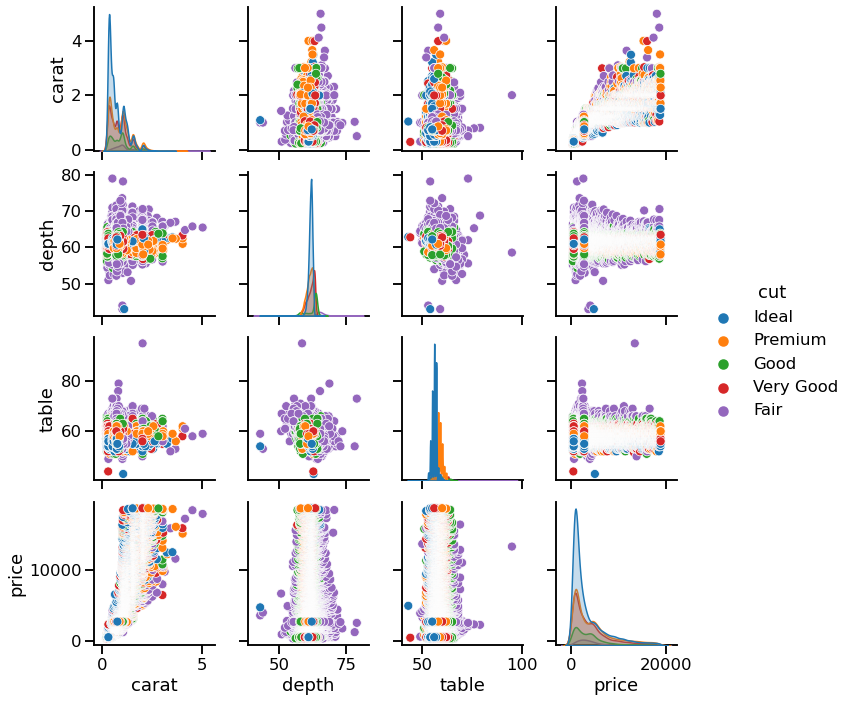

In [94]:
sns.pairplot(diamonds, hue = 'cut')

&#9989;  **Question 2.1.7 (9 points)**: Answer the following questions **without the use of any code!!!**.

1. What columns did you use in `hue` ? 

2. Why did you choose this value ?

3. Is there any pattern or specific information that you can extract from this plot? 

4. For each of the following pairs estimate a correlation value. 

    Choices are [greater than 0.5, less than -0.5, approximately 0] 
    
        a. table vs price  
        b. depth vs price
        c. carat vs price   
        d. depth vs table
        
5. If you were to use linear regression what columns would you choose for your X, and Y ?

<font size=+3>&#9998;</font> Put your answers here:
1. I used the cut in hue to determine diamond type. 
2. I chose this column because it is a nominal variable that only has five unique types. It seemed like the easiest and most relatable thing to use to classify the data.
3. I'm looking at the carat vs. carat plot and the price vs. price plot first. These tell me where the distribution of the diamonds are. Most of the diamonds are relatively small and inexpensive. The colors allow me to see clusters in the data, but right now it is difficult to make much sense of what they mean.
4. table vs. price: greater than 0.5; 
depth vs. price: greater than 0.5; 
carat vs. price: greater than 0.5;
depth vs. table: approximately 0


&#9989; **Question 2.1.8 (6 points)**: From experience we know that the price of a diamond increases with its carats, but the dataset gives us more information and we would like to know what other factors influence the price. The pairplot above does not tell us much about the correlation between non-numeric columns so we need to find them ourselves.

The goal of this question is to find the characteristic with the highest correlation between price and carat. 
In other words, 

1. What value of `cut` has the highest correlation between `price` and `carat` ?

2. What value of `color` has the highest correlation between `price` and `carat` ?

3. What value of `clarity` has the highest correlation between `price` and `carat` ?

4. Which value of the above ones is the highest? 

**HINT:** This question requires a bit of ingenuity. Printing all the correlation matrices and looking the highest value is allowed, BUT you will get only half the points. You could definitely use this method to get insights, but can you write code that does not require me to read all those matrices? After all this class requires you to come up with ways to find the answer.

In [95]:
# Group by unique value, correlate with variables, and stuff
by_cut = diamonds.groupby('cut')[['price','carat']].corr().unstack().iloc[:,1]
by_color = diamonds.groupby('color')[['price','carat']].corr().unstack().iloc[:,1]
by_clarity = diamonds.groupby('clarity')[['price','carat']].corr().unstack().iloc[:,1]

# turn list into dataframe
by_cut = pd.DataFrame(by_cut)
by_color = pd.DataFrame(by_color)
by_clarity = pd.DataFrame(by_clarity)

# sort outputs in descending order to appropiately answer question above
print(by_cut.sort_values([('price', 'carat')], ascending=False))
print(by_color.sort_values([('price', 'carat')], ascending=False))
print(by_clarity.sort_values([('price', 'carat')], ascending=False))

              price
              carat
cut                
Ideal      0.931176
Very Good  0.926370
Premium    0.925005
Good       0.922472
Fair       0.859299
          price
          carat
color          
J      0.952355
I      0.951845
H      0.941982
G      0.928980
E      0.914340
F      0.911426
D      0.900741
            price
            carat
clarity          
SI1      0.957456
SI2      0.954403
VS2      0.952374
VS1      0.950227
I1       0.948570
VVS2     0.948474
VVS1     0.940417
IF       0.929481


<font size=+3>&#9998;</font> Put your answers here:
 I think this is organized in a way that the question intended so as to not have to search out and locate the highest value in a correlation matrix.

1. The Ideal cut has the highest correlation between price and carat at 0.931176 
2. The J color has the highest correlation between price and carat at 0.952355
3. The SI1 clarity has the highest correlation between price and carat at 0.957456
4. Of the above values, clarity SI1 has the highest correlation with price and carat.



### Part 2.2 Linear Regression with `statsmodels` (23 points).

The goal of part 2.1 was to find the independent and dependent variables for our linear regression. Now that we have them let's explore some linear regression.


&#9989;  **Question 2.2.1 (3 points)**: Based on your answer from the above question 

1. use a mask to select the data with the highest correlation value overall
2. make a scatter plot with `price` on the Y axis and `carat` on the X axis
3. Don't forget to label the axis!!!


            price
            carat
clarity          
I1       0.948570
IF       0.929481
SI1      0.957456
SI2      0.954403
VS1      0.950227
VS2      0.952374
VVS1     0.940417
VVS2     0.948474


Text(0.5, 1.0, 'Diamond Price vs. Carat')

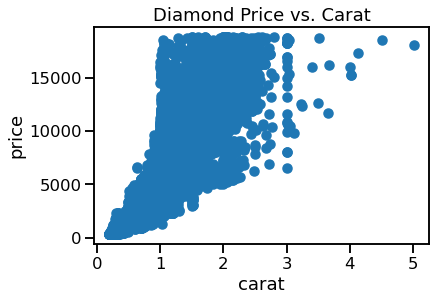

In [96]:
# Put your code here
print(by_clarity)
clarity_mask = max(by_clarity[('price', 'carat')])
clarity_mask

plt.scatter(diamonds['carat'],diamonds['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Diamond Price vs. Carat')

&#9989;  **Question 2.2.2 (3 points)**: Answer the following question

1. Does the plot look linear?

2. Does the plot look linear if you plot the `log` of `price` ? 

3. Does the plot look linear if you plot the `sqrt` of `price` ?

Text(0.5, 1.0, 'Diamond Price vs. Carat, Log Transformation')

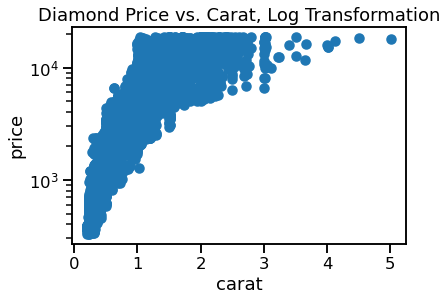

In [97]:
plt.scatter(diamonds['carat'],diamonds['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.yscale('log')
plt.title('Diamond Price vs. Carat, Log Transformation')

Text(0.5, 1.0, 'Diamond Price vs. Carat, Sqrt Transformation')

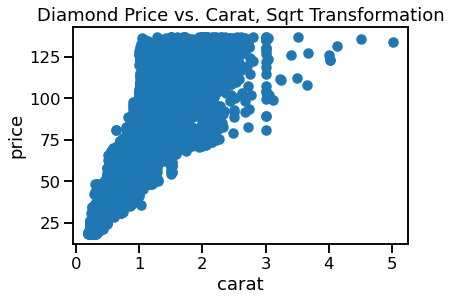

In [98]:
plt.scatter(diamonds['carat'],np.sqrt(diamonds['price']))
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Diamond Price vs. Carat, Sqrt Transformation')

<font size=+3>&#9998;</font> Put your answers here:

1. The first plot does not look linear.
2. The log transformation of price does not make the plot look linear.
3. The square root transformation of price does make the plot look linear.

&#9989;  **Question 2.2.2 (6 points)**: Based on your previous answer. 

1. Use `statsmodels` to perform linear regression on the most linear plot.

2. Print a summary of your results

***Hint:*** Look over your PCAs and ICAs 

In [99]:
# Put your code here
import statsmodels.api as sm

x = diamonds['carat']
y = diamonds['price']

diamond_model = sm.OLS(y,x)
results = diamond_model.fit()

x_with_constant = sm.add_constant(x)

model = sm.OLS(y,x_with_constant)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:08:55   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.0

&#9989;  **Question 2.2.3 (3 points)**: Based on your previous answer. 

1. What are the values of the slope and intercept?

2. What is the value of your Adj. R-squared ?

3. Looking at the summary, do you trust that a linear fit is a good choice ?

<font size=+3>&#9998;</font> Put your answers here:
1. Slope: 7756.4256     Intercept: -2256.3606
2. Adj R-Squared: 0.849
3. Yes, I think the linear model is a good choice here because the adjusted r-squared value is close to 1.

&#9989;  **Question 2.2.4 (3 points)**: Use [`sm.graphics.plot_regress_exog`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html) to plot your regression results. Make your figure 15 x 8.


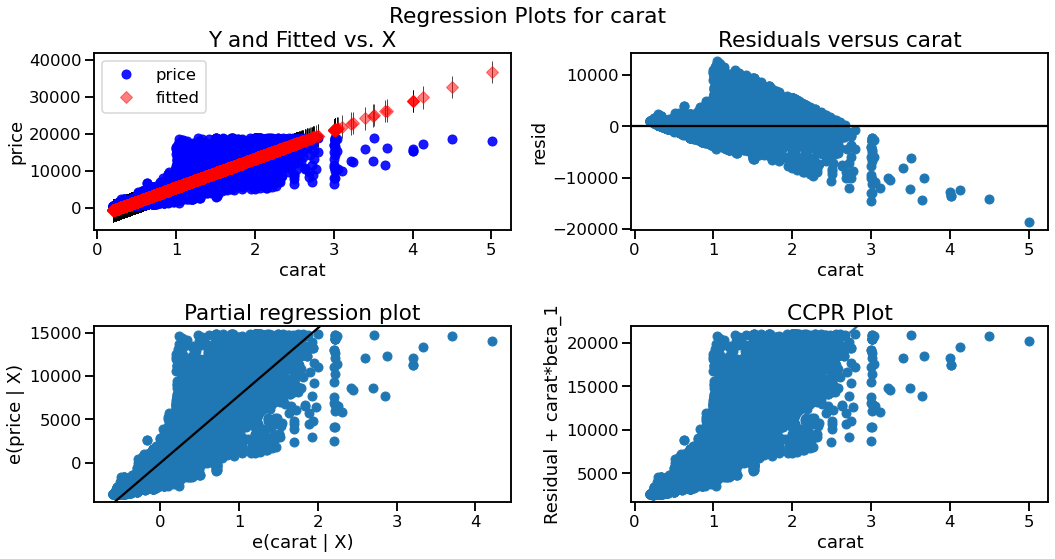

In [100]:
# Put your code here
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, 'carat', fig=fig)

&#9989;  **Question 2.2.5 (3 points)**: Do you think that a linear regression is a valid model ? Justify your answer.

**HINT:** Look at what we have done in the ICA.



<font size=+3>&#9998;</font> Put your answers here:
Yes, a using a linear model can be justified. The distribution of residuals is more or less evenly distributed in the plot, until you get to the outliers, that is. And that can certainly be expected. We want a model that is a good fit for this type of data, and not a model that perfectly fits this particular data. Then it wouldn't be useful for other smiliar dartasets that have different values.


---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

## Part 3: Mulitple Regression (33 points + 5 BONUS points)

In this part of the homework, you will work with data from the California Housing Prices dataset. Our goal is to use ordinary least squares to design a linear model to fit the median house value in a California census district given eight features. We will try both a linear model using all the provided features, as well as a reduced linear model which only uses a subset of the features. 

&#9989;  **Question 3.1 (1 points)**: **Do This:** Download the file `housing.csv` from the link below, and save it into the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the file.** If you did not use a command line tool to download the file, write down the command(s) that would have downloaded the file.

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S22-data/main/data/housing.csv`

``` bash
# Put the command(s) for downloading the file here!
wget https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S22-data/main/data/housing.csv
```

&#9989;  **Question 3.2 (2 points)**: **Do This:** To get started, read in the `housing.csv` dataset into a Pandas DataFrame, and then display some of its rows.

In [101]:
# Put your code here
housing = pd.read_csv('housing.csv')
housing

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,6.984127,1.023810,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,6.238137,0.971880,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,8.288136,1.073446,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,5.817352,1.073059,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,6.281853,1.081081,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,5.045455,1.133333,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,6.114035,1.315789,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,5.205543,1.120092,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,5.329513,1.171920,741,349,1.8672,84700,INLAND


&#9989;  **Question 3.3 (2 points)**: You should notice that the DataFrame has a non-numerical feature called "ocean_proximity". There are also a few rows with `NaN` values, although you may not see them in the few rows that were displayed. **Do This:** **Drop the "ocean_proximity" column from the dataframe, and drop all the rows with `NaN` values.** Note that we will not use the "ocean_proximity" column or any of the rows with `NaN` values in this assignment.

In [102]:
# Put your code here
housing = housing.drop(['ocean_proximity'],axis=1)
housing = housing.dropna(axis=0)
housing

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,6.984127,1.023810,322,126,8.3252,452600
1,-122.22,37.86,21,6.238137,0.971880,2401,1138,8.3014,358500
2,-122.24,37.85,52,8.288136,1.073446,496,177,7.2574,352100
3,-122.25,37.85,52,5.817352,1.073059,558,219,5.6431,341300
4,-122.25,37.85,52,6.281853,1.081081,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,5.045455,1.133333,845,330,1.5603,78100
20636,-121.21,39.49,18,6.114035,1.315789,356,114,2.5568,77100
20637,-121.22,39.43,17,5.205543,1.120092,1007,433,1.7000,92300
20638,-121.32,39.43,18,5.329513,1.171920,741,349,1.8672,84700


&#9989;  **Question 3.4 (6 points)**: **Do This:** Using the `OLS()` method in `statsmodels.api`, make an ordinary least squares model that predicts "median_house_value" using the other features and display the `.summary()` of that process. **Be sure to use the `add_constant()` method to add a column of ones to the DataFrame before using the `OLS()` method so that your linear model includes a constant term.**

In [103]:
# Put your code here
# add constant column with value
housing['constant'] = 1

#create dataframe that has dependent value column dropped
housing_med_val_dropped = housing.drop(['median_house_value'],axis=1)

# create model that runs dependent var against rest of data
model = sm.OLS(housing['median_house_value'], housing_med_val_dropped)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4514.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:09:23   Log-Likelihood:            -2.5677e+05
No. Observations:               20433   AIC:                         5.136e+05
Df Residuals:                   20424   BIC:                         5.136e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude          -4.223e+04    725.615    -58.205      0.000   -4.37e+04   -4.08e+04
latitude           -4.213e+04    692.323    -60.854      0.000   -4.35e+04   -4.08e+04
housing_median_age  1139.3771     43.181     26.386      0.000    1054.739    1224.015
avg_rooms          -6625.2745    573.271    -11.557      0.000   -7748.932   -5501.617
avg_bedrooms        4.571e+04   2737.024     16.699      0.000    4.03e+04    5.11e+04
population           -41.2977      1.036    -39.865      0.000     -43.328     -39.267
households           134.5370      3.087     43.583      0.000     128.486     140.588
median_income       4.156e+04    406.403    102.256      0.000    4.08e+04    4.24e+04
constant           -3.558e+06   6.35e+04    -56.021      0.000   -3.68e+06   -3.43e+06
==============================================================================
Omnibus:                     4964.002   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20949.365
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.404   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989;  **Question 3.5 (6 points)**: **Answer These Questions:** 
1. Based on the output of the OLS summary, does this linear model appear to be a good fit? 
2. Which of these features appear to be "significant" in predicting the "median_house_value"?

<font size=+3>&#9998;</font> Put your answers here:
1. Well, I'd probably be content with this, but with an adjusted r-squared value of 0.639, there is still plenty of room for improvement. I can't give you a solid answer because this depends on the user's tolerance for error, so it's pretty subjective. So I can interpret what I'm supposed to interpret here, but its just subjective. Can I still get the points, haha?

2. My summary says every single features is very significant, with a 0% chance that the significance is not due to chance.

&#9989;  **Question 3.6 (4 points)**: A student from U of M managed to enroll in this class (don't ask us how) and is working on this homework. They got the following output when they used the `OLS()` method in `statsmodels.api`. 

<img src="https://i.ibb.co/pnvcKQ2/Perfect-Model.png" width="400px" border="0">

When you compare outputs, the Wolverine tells you "My linear model is better than yours because my linear model has a larger $R^2$-value than your model. I guess Wolverines are way better than Spartans at data science."

**Answer These Questions:** 
1. How did they get a linear model with a near perfect $R^2$-value? 
2. Is their model actually better than yours? 

Justify your answers.

<font size=+3>&#9998;</font> Put your answers here:
1. The U of M student included the dependent variable in the multiple regression model. When you include the dependent variable as an independent variable, of course you're going to get a perfect r-squared value. I know this because their model has 9 degrees of freedom, whereas mine only has 8. The only way they could have had an extra DF is by neglecting to remove the dependent variable from the data.
2. Their model is not better than mine, because it is not robust. It is more accurate, but only for this very specific set of data. If we use their model on a dataset with different values it is probably not going to work out that well.


&#9989;  **Question 3.7 (6 points)**: In the output of the OLS summary, you should have seen a note that says something like 

"The condition number is large, [[number]]. This might indicate that there are strong multicollinearity or other numerical problems." 

Multicollinearity is a statistical phenomenon where some of the features in a model can be linearly predicted using some of the other features in the model. In other words, the features in the model are somewhat redundant. Hence, even if each feature may be deemed significant, it may still be possible to form a "reduced" model using a smaller number of features. 

**Do This:** See if you can design a second linear model which uses a subset of the eight features to predict the "median_house_value", and fits the data comparably well as the first linear model you designed in Question 3.4. You can choose this subset either by trial and error, or by any other method you'd like.

In [104]:
housing

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,households,median_income,median_house_value,constant
0,-122.23,37.88,41,6.984127,1.023810,322,126,8.3252,452600,1
1,-122.22,37.86,21,6.238137,0.971880,2401,1138,8.3014,358500,1
2,-122.24,37.85,52,8.288136,1.073446,496,177,7.2574,352100,1
3,-122.25,37.85,52,5.817352,1.073059,558,219,5.6431,341300,1
4,-122.25,37.85,52,6.281853,1.081081,565,259,3.8462,342200,1
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,5.045455,1.133333,845,330,1.5603,78100,1
20636,-121.21,39.49,18,6.114035,1.315789,356,114,2.5568,77100,1
20637,-121.22,39.43,17,5.205543,1.120092,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,5.329513,1.171920,741,349,1.8672,84700,1


In [105]:
# Put your code here
# add constant column with value
housing['constant'] = 1

#create dataframe that has dependent value column dropped
housing_med_val_dropped = housing.drop(['median_house_value','avg_rooms'],axis=1)

# create model that runs dependent var against rest of data
model = sm.OLS(housing['median_house_value'], housing_med_val_dropped)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     5107.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:09:31   Log-Likelihood:            -2.5683e+05
No. Observations:               20433   AIC:                         5.137e+05
Df Residuals:                   20425   BIC:                         5.137e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude          -4.436e+04    704.120    -63.005      0.000   -4.57e+04    -4.3e+04
latitude           -4.461e+04    660.499    -67.534      0.000   -4.59e+04   -4.33e+04
housing_median_age  1170.4687     43.237     27.071      0.000    1085.722    1255.216
avg_bedrooms        1.648e+04   1051.414     15.679      0.000    1.44e+04    1.85e+04
population           -42.8180      1.031    -41.535      0.000     -44.839     -40.797
households           140.2498      3.057     45.878      0.000     134.258     146.242
median_income       3.804e+04    270.235    140.767      0.000    3.75e+04    3.86e+04
constant           -3.716e+06   6.22e+04    -59.727      0.000   -3.84e+06   -3.59e+06
==============================================================================
Omnibus:                     5062.317   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19806.161
Skew:                           1.189   Prob(JB):                         0.00
Kurtosis:                       7.196   Cond. No.                     2.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989;  **Question 3.8 (4 points)**: **Answer This:** How did your reduced linear model fit the data compared to the full linear model you created in Question 3.4? Give some quantitative justification for this answer.

<font size=+3>&#9998;</font> Put your answers here:
I tried every combination of a reduced model I could think of. The closest I could get to my original model was by ommitting only one other feature, the avg_rooms. This gave me an adjusted r-quared value of 0.636, with is only slightly less than my original value of 0.639. I was getting wildly different adjusted r-squared values wach time I would try a different combination, and I guess I should not have been surprised because the original model summary said every features was very statistically significant. As it stands, the features in my reduced model are all stil very statistically significant. I probably could have removed the constant term, but that didn't seem like a good idea.


&#9989;  **BONUS Question 3.9 (5 points)**: In Question 3.4, the directions specified to fit a linear model **with a constant term**. For fun, we fit a linear model without a constant term as well. Here is a comparison of the OLS summaries for the full linear model with a constant term (left) and without a constant term (right).

<img src="https://i.ibb.co/mHJmtWQ/Comparison.png" width="800px" border="0">

You'll notice that the $p$-value for the constant term is very small. So one might argue that the constant term is a "significant" component of the model, and thus the model with the constant term is better. However, the $R^2$-value is much higher for the linear model without a constant term, and so one could also argue that the model without a constant term is better. 

**Answer This:** Can you explain what seems like a contradiction here? Which model (with or without a constant) do you think is more appropriate for predicting the "median_house_value", and why?

<font size=+3>&#9998;</font> Put your answers here:
Well, if I understand this stuff correctly, the constant is the mean value if the dependent variable if independent variables are set to zero. The constant provides a guard against introducing bias to the model. Removing the constant will alter our coefficients and screw everything up. Our model might show a higher r-squared value, but it would be misleading. The model without the constant could also produce larger residuals with higher standard deviations, and that's not cool. Essentially, since the model still needs a y-intercept to work, it will be artificially set to some value instead of being estimated from the actual data being modeled.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

## Part 1. Continued (3 points)


It is now time to merge your changes to the main branch and push

&#9989; **Question 1.8 (1 point):** Switch to your main branch

```bash
# Put the command(s) to switch to your main branch
git checkout main
```

&#9989; **Question 1.9 (1 point):** Merge your hw04-branch

```bash
# Put the command(s) to merge your branch
git merge hw04_branch
```

&#9989; **Question 1.10 (1 point):** Finally push the changes to GitHub

```bash
# Put the command(s) to push your new main branch
git push
```

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofVWe89dpqk1HpKW7eyyv-IhUOU5NSUtUUFNFMTBWVEdKQUkzR1ZPWllHWi4u" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #4, and upload it there.

![Moira2](https://media.giphy.com/media/d1E2HnwywoTkES08/giphy.gif)

&#169; Copyright 2022,  Department of Computational Mathematics, Science and Engineering at Michigan State University